In [1]:
import osmnx as ox

import os

In [3]:
ox.__version__

'1.1.2'

In [8]:
# Make sure you run this
ox.config(use_cache=True)

**OSMNX Tutorials/Reference**

[Node elevations and edge grades](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/12-node-elevations-edge-grades.ipynb)

[Save/load street network models to/from disk](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/05-save-load-networks.ipynb)

[OSMnx overview: querying, simplifying, visualizing, saving](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/01-overview-osmnx.ipynb)

In [34]:
# Bounding box containing Donetsk, FIXME _Lushanks_, and Rostov

# ** PLEASE only run this function once, and make sure it works. It downloads a lot of data so make sure you have storage space and please don't torture the OSM servers.
# * I will let you know how big it is once it finishes downloading (It's about 412 Mb) Nevermind that's too many roads - down to 17.8 MB
def get_ukr_road_network():
  # Save this as a function so we can check whether or not there is an existing file with this road network.
  north, south, east, west = 50.05, 46.05, 44.25, 36.70

  G = ox.graph_from_bbox(north, south, east, west, network_type="drive", custom_filter='["highway"~"motorway|trunk|primary|secondary"]') # FIXME: Make it only highways

  # save street network as GeoPackage to work with in GIS and graphML for OSMNX loading
  ox.save_graphml(G, filepath="ukr_road_network.graphml")
  ox.save_graph_geopackage(G, 'ukr_road_network.gpkg')

In [35]:
get_ukr_road_network()

**Load the road network from the file**

In [36]:
# === Reading File === #
G = ox.load_graphml("ukr_road_network.graphml")

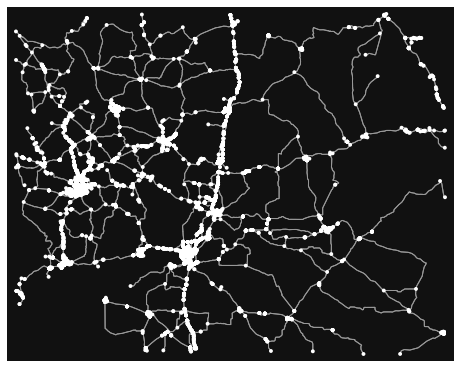

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [39]:
# === Plotting === #
ox.plot_graph(G)

In [40]:
import pandas as pd
import numpy as np

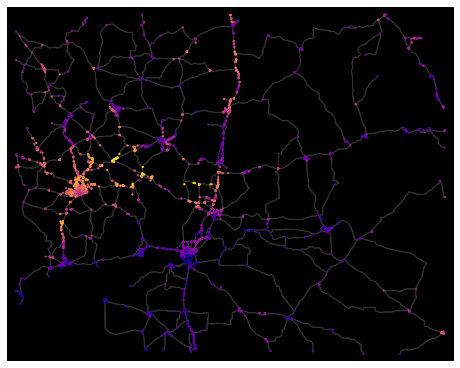

In [46]:
# === Incorporate Elevation Data === #
opentopography_data_path = '../data/base_layer/ukr_elevation_data/'


raster_paths = [ f"{opentopography_data_path}N{lat}E0{long}.tif" for lat in range(45,51) for long in range(35,46) ] # FIXME: These are actually slope

G = ox.elevation.add_node_elevations_raster( G, raster_paths )

assert not np.isnan(np.array(G.nodes(data="elevation"))[:, 1]).any()

G = ox.elevation.add_edge_grades(G, add_absolute=True)

# get one color for each node, by elevation, then plot the network
nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
fig, ax = ox.plot_graph(G, node_color=nc, node_size=5, edge_color="#333333", bgcolor="k")

In [50]:
"""import os
## DO NOT RUN THIS - this was just getting rid of a bunch of unncessary data
_paths = [ f"N{lat}E0{long}.tif" for lat in range(45,51) for long in range(35,46) ]

for file in os.listdir('../data/base_layer/ukr_elevation_data'):
  if ('.tif' in file) and not (file in _paths):
    os.remove(f'{opentopography_data_path}{file}')"""

In [ ]:
# === Helper function fror impedance === #
# https://github.com/gboeing/osmnx-examples/blob/main/notebooks/12-node-elevations-edge-grades.ipynb
# * Go here ^ for instructions

In [ ]:
# === Start and End Points for Humanitarian Corridors === #

In [ ]:
# === Use Pathfinding to get most likely 